In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score 





In [2]:
data = pd.read_csv("2000R_features_50_50.csv")
data.drop(data.columns[[0,1,2]], axis=1, inplace=True)
X = data.iloc[:,:27]
y = data.iloc[:,[27]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,shuffle = True,stratify=y, test_size=0.20, random_state = 0)

k = RepeatedKFold(n_splits=10, n_repeats=3)

In [3]:

#SVM 
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

svc_acc = clf.score(X_test, y_test)*100
scores = cross_val_score(clf, X, y, cv=k,n_jobs = -1) 
svc_crossval = round(scores.mean()*100, 4)

#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_acc = knn_classifier.score(X_test, y_test)*100
scores = cross_val_score(knn_classifier, X, y, cv=k,n_jobs = -1)
knn_crossval = round(scores.mean()*100, 2)

#Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_acc = dt_classifier.score(X_test, y_test)*100
scores = cross_val_score(dt_classifier, X, y, cv=k,n_jobs = -1) 
dt_crossval =round(scores.mean()*100, 2)

#Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_acc = rf_classifier.score(X_test, y_test)*100
scores = cross_val_score(rf_classifier, X, y, cv=k,n_jobs = -1) 
rf_crossval = round(scores.mean()*100, 2)

#Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
lr_acc = logreg.score(X_test, y_test)*100
scores = cross_val_score(logreg, X, y, cv=k,n_jobs = -1) 
lr_crossval = round(scores.mean()*100, 2)

#Gausian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
GNB_acc = gnb.score(X_test, y_test)*100
scores = cross_val_score(gnb, X, y, cv=k,n_jobs = -1) 
GNB_crossval = round(scores.mean()*100, 2)

#Ensemble Methods
#Bagged SVM
bagged_svm = BaggingClassifier(base_estimator=SVC(kernel='rbf')).fit(X_train, y_train)
BSVM_acc = bagged_svm.score(X_test,y_test)*100
results = model_selection.cross_val_score(bagged_svm, X, y, cv=k,n_jobs = -1)
BSVM_crossval = round(results.mean()*100, 2)

# Extra Trees
extra_tree = ExtraTreesClassifier().fit(X_train,y_train)
ET_acc = extra_tree.score(X_test,y_test)*100
results = model_selection.cross_val_score(extra_tree, X, y, cv=k,n_jobs = -1)
ET_crossval = round(results.mean()*100, 2)

#Boosting
# AdaBoost Classification
adaboosting = AdaBoostClassifier().fit(X_train,y_train)
AB_acc = adaboosting.score(X_test,y_test)*100
results = model_selection.cross_val_score(adaboosting, X, y, cv=k,n_jobs = -1)
AB_crossval = round(results.mean()*100, 2)

#Stochastic Gradient Boosting
stochastic_model = GradientBoostingClassifier().fit(X_train,y_train)
SGB_acc = stochastic_model.score(X_test,y_test)*100
results = model_selection.cross_val_score(stochastic_model, X, y, cv=k,n_jobs = -1)
SGB_crossval = round(results.mean()*100, 2)


#Voting Ensemble
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(probability=True)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn', model4))
model5 = RandomForestClassifier()
estimators.append(('rf', model5))

ensemble_mod = VotingClassifier(estimators).fit(X_train,y_train) 
VC_acc = ensemble_mod.score(X_test,y_test)*100
results = model_selection.cross_val_score(ensemble_mod, X, y, cv=k,n_jobs = -1)
VC_crossval = round(results.mean()*100, 2)


In [4]:
## ROC
classifiers = [
               SVC(kernel='rbf', probability=True),
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               LogisticRegression(),
               GaussianNB(),
               BaggingClassifier(base_estimator=SVC(kernel='rbf')),
               ExtraTreesClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
                VotingClassifier(estimators,voting="soft"),
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','score','auc'])

 # Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    acc = model.score(X_test,y_test)*100
    cross_val = round(cross_val_score(model, X, y, cv=k,n_jobs = -1).mean()*100,2)
    yproba = model.predict_proba(X_test)[::,1]
    
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'score':acc,
                                        'cross val':cross_val,
                                        'auc':round(auc*100,2),
                                        }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table   
                                         


,score,auc,cross val
classifiers,,,
SVC,66.421544,70.75,53.89
KNeighborsClassifier,71.757925,77.68,NaN
DecisionTreeClassifier,77.938984,77.94,78.39
RandomForestClassifier,85.928650,93.12,86.50
LogisticRegression,64.970685,70.82,65.45
GaussianNB,51.088145,69.97,50.51
BaggingClassifier,66.381795,67.15,53.93
ExtraTreesClassifier,86.375832,93.55,86.83
AdaBoostClassifier,72.523104,80.86,73.34


In [5]:

result_table.to_excel('accuracy 2000R_features_50_50.xlsx', index = False)

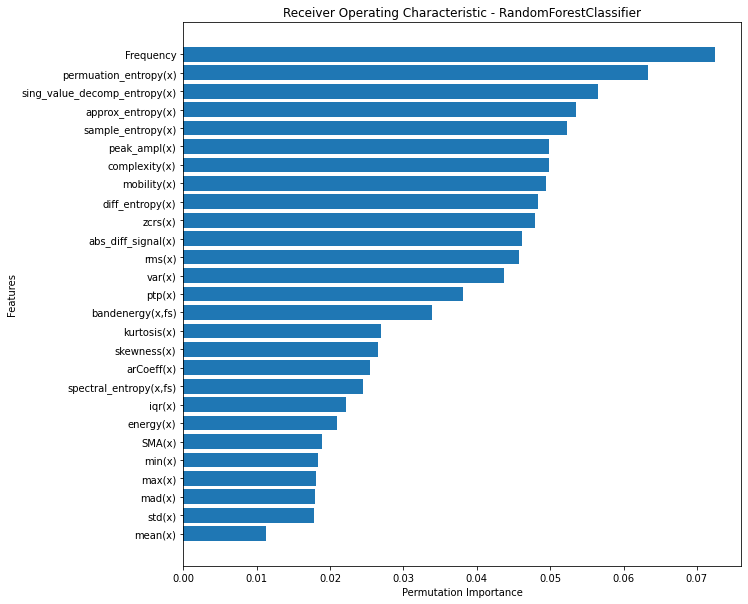

In [6]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
features = ['mean(x)','std(x)','mad(x)','max(x)','min(x)','SMA(x)','energy(x)','iqr(x)','spectral_entropy(x,fs)','arCoeff(x)','skewness(x)','kurtosis(x)','bandenergy(x,fs)','ptp(x)','var(x)','rms(x)',
         'abs_diff_signal(x)','zcrs(x)','diff_entropy(x)','mobility(x)','complexity(x)','peak_ampl(x)','sample_entropy(x)','approx_entropy(x)','sing_value_decomp_entropy(x)','permuation_entropy(x)','Frequency']
sorted = rf_classifier.feature_importances_.argsort()
plt.barh(features, rf_classifier.feature_importances_[sorted])
plt.ylabel('Features')
plt.xlabel("Permutation Importance")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

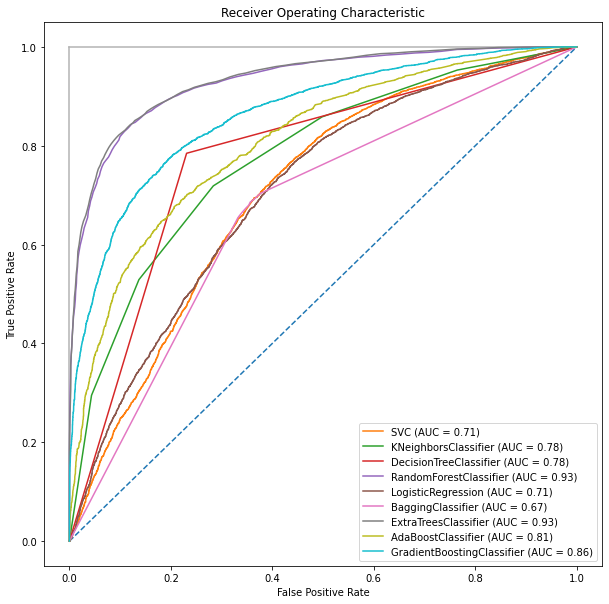

In [7]:
from sklearn.metrics import auc

cassifiers = [clf,
              knn_classifier,
              dt_classifier,
              rf_classifier,
              logreg,
              # gnb,
              bagged_svm,
              extra_tree,
              adaboosting,
              stochastic_model,
              ]
plt.figure()
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
for i in cassifiers:
  y_score = i.predict_proba(X_test)[:,1]
  false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
  auc_score = auc(false_positive_rate, true_positive_rate);
  plt.plot(false_positive_rate, true_positive_rate, label='{0} (AUC = {1:0.2f})'
             ''.format(i.__class__.__name__, auc_score))

plt.legend(loc='best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(r'C:\Users\hari\Desktop\Run\R\\Ripples_ROC Curve.eps', format='eps', dpi=1000)
plt.savefig(r'C:\Users\hari\Desktop\Run\R\\Ripples_ROC Curve.pdf', format='pdf', dpi=1000)
plt.show()